In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Neural_Network():
    """
    Neural Network with one hidden layer.
    """
    def __init__(self, input_shape: int, hidden_layer_size: int, output_layer_size: int):
        self.input_shape = input_shape
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size

        self.theta1 = self.generate_thetas(hidden_layer_size, input_shape + 1)
        self.theta2 = self.generate_thetas(output_layer_size, hidden_layer_size + 1)

    def generate_thetas(self, m: int, n: int):
        """
        Generates weights for a layer of neural network.
        Returns random matrix with size m x n.
        
        :m - number of units in the next layer
        :n - number of units in the current layer + 1
        """
        return np.random.normal(size=(m, n))

    def sigmoid(self, z):
        """
        Activation function.
        
        :z - integer, matrix or vector
        """
        return 1 / (1 + np.exp(-z))

    def sigmoid_gradient(self, z):
        """
        Calculates gradient of activation function.
        
        :z - integer, matrix or vector
        """
        sig = self.sigmoid(z)
        return sig * (1 - sig)

    def predict(self, X):
        """
        Predicts the corresponding y value for X.
        Returns predictions array.
        
        :X - example matrix
        """
        m = len(X)
        
        h1 = self.sigmoid( np.c_[np.ones((m, 1)), X].dot(self.theta1.T) )
        h2 = self.sigmoid( np.c_[np.ones((m, 1)), h1].dot(self.theta2.T) )
        return h2


    def backpropagation(self, X, y, learning_rate, lambda_val):
        """
        Calculates the cost and gradient of the cost function.
        Returns cost value
        
        :X, y - training set
        :learning_rate - step of gradient descent
        :lambda_val - regularization parameter
        """
        m = len(X)
        shape = (*X.shape[:-1], 1)
        X = np.c_[np.ones(shape), X]

        J = 0
        theta1_grad = np.zeros(self.theta1.shape)
        theta2_grad = np.zeros(self.theta2.shape)

        for i in range(m):
            a1 = X[i,:].T
            z2 = self.theta1.dot(a1)
            a2 = self.sigmoid(z2)
            a2 = np.r_[np.ones((1, 1)), a2]

            z3 = self.theta2.dot(a2)
            a3 = self.sigmoid(z3)
            
            output = np.zeros((self.output_layer_size, 1))
            output[y[i]] = 1
            
            cost = (1 / m) * sum( -output * np.log(a3) - (1 - output) * np.log(1 - a3) )
            J += cost
            
            delta3 = a3 - output
            delta2 = (self.theta2.T.dot(delta3))[1:] * self.sigmoid_gradient(z2)
            theta2_grad += delta3.dot(a2.T)
            theta1_grad += delta2.dot(a1.T)
        
        theta1_sum = sum( self.theta1[:,1:].ravel() ** 2 )
        theta2_sum = sum( self.theta2[:,1:].ravel() ** 2 )
        t_sum = theta1_sum + theta2_sum
        reg_part = ( lambda_val / (2 * m) ) * t_sum
        J = J + reg_part

        theta1_grad = theta1_grad / m
        theta1_grad[:,1:] = theta1_grad[:,1:] + (lambda_val / m) * self.theta1[:,1:]
        theta2_grad = theta2_grad / m
        theta2_grad[:,1:] = theta2_grad[:,1:] + (lambda_val / m) * self.theta2[:,1:]

        self.theta1 -= learning_rate * theta1_grad
        self.theta2 -= learning_rate * theta2_grad

        return J[0]

    def fit(self, X, y, learning_rate, lambda_val, epochs=15):
        """
        Trains the Neural Network.
        Returns history of cost values.
        
        :X, y - training set
        :learning_rate - step of gradient descent
        :lambda_val - regularization parameter
        """
        J_history = []
        for epoch in range(epochs):
            new_cost = self.backpropagation(X, y, learning_rate, lambda_val)
            J_history.append(new_cost)
            print(f"Epoch: {epoch + 1}. Cost: {new_cost}")
        
        return J_history

# Neural network in digit recognition task

### Import useful modules

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

### Load dataset

In [4]:
X, y = load_digits(return_X_y=True)

X.shape

(1797, 64)

### Reshape dataset so that each row contains a matrix of pixels

In [5]:
X = X.reshape((len(X), 1, len(X[0])))
X.shape

(1797, 1, 64)

### Let's plot a few digit images

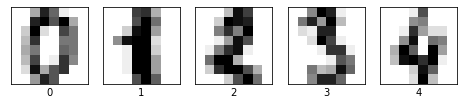

In [6]:
plt.figure(figsize=(8, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

### Split dataset into train and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Create an instance of Neural Network and train it

In [8]:
nn = Neural_Network(input_shape=64, hidden_layer_size=25, output_layer_size=10)

In [9]:
J_history = nn.fit(X_train, y_train, learning_rate=1, lambda_val=1, epochs=100)

Epoch: 1. Cost: 17.470353519825835
Epoch: 2. Cost: 6.281868882162658
Epoch: 3. Cost: 5.338169529813028
Epoch: 4. Cost: 4.744091578615786
Epoch: 5. Cost: 4.392523577104829
Epoch: 6. Cost: 4.139805993593827
Epoch: 7. Cost: 3.9763373112314593
Epoch: 8. Cost: 3.8749540384901318
Epoch: 9. Cost: 3.785102949849671
Epoch: 10. Cost: 3.7176906566854573
Epoch: 11. Cost: 3.6444840885647287
Epoch: 12. Cost: 3.5757754427319135
Epoch: 13. Cost: 3.509743906078275
Epoch: 14. Cost: 3.4463195599108145
Epoch: 15. Cost: 3.391411979404269
Epoch: 16. Cost: 3.344748437525854
Epoch: 17. Cost: 3.291739148699787
Epoch: 18. Cost: 3.2460523530156413
Epoch: 19. Cost: 3.206095343800964
Epoch: 20. Cost: 3.1475188136369323
Epoch: 21. Cost: 3.1091288412754046
Epoch: 22. Cost: 3.0720510057711703
Epoch: 23. Cost: 3.0342897118521326
Epoch: 24. Cost: 2.996197571555579
Epoch: 25. Cost: 2.959706445483438
Epoch: 26. Cost: 2.930117759689254
Epoch: 27. Cost: 2.8993241095254727
Epoch: 28. Cost: 2.8710667652609434
Epoch: 29. Cost

### Let's plot the cost change over all iterations

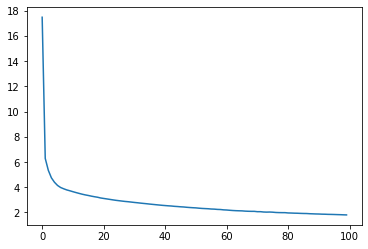

In [10]:
plt.plot(J_history)
plt.show()

The graph quickly decreases and then flattens out after a while. This means that we have selected the correct parameters of the neural network

### Let's plot some digits with their prediction

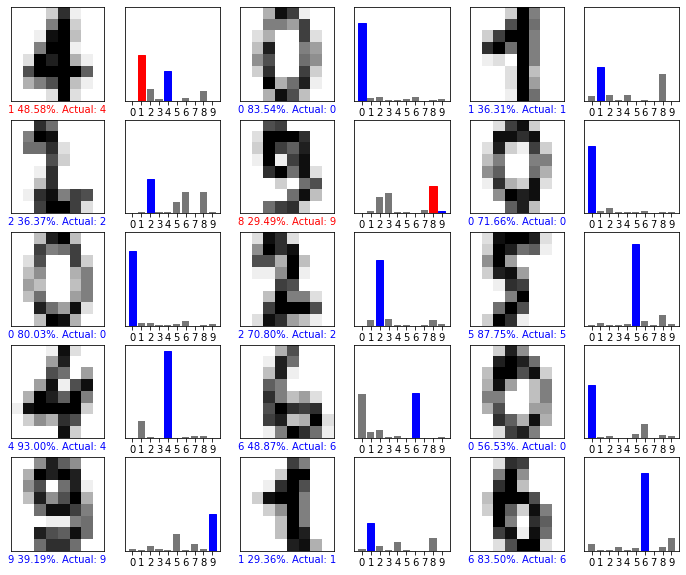

In [11]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.binary)
    
    predictions_array = nn.predict(X_test[i])
    predicted_label = np.argmax(predictions_array)
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:0.2f}%. Actual: {}".format(predicted_label,
                                                100*np.max(predictions_array),
                                                true_label), color=color)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.xticks(range(10))
    plt.yticks([])
    plt.grid(False)
    plt.ylim([0, 1])
    value_arr_plot = plt.bar(range(10), predictions_array[0], color="#777777")

    value_arr_plot[predicted_label].set_color('red')
    value_arr_plot[true_label].set_color('blue')

plt.show()

### Let's calculate accuracy of our Neural Network

In [12]:
correct_pred = 0
m = len(X_test)
for i in range(m):
    predict = np.argmax(nn.predict(X_test[i]))
    if predict == y_test[i]:
        correct_pred += 1
accuracy = correct_pred / m
print(f"Accuracy: {accuracy}")

Accuracy: 0.8018518518518518
